In [1]:
from brian2 import *

prefs.codegen.target = "numpy"

WARNING    /var/folders/dk/88m9s1b50v53bxqm50d17bjm0000gp/T/ipykernel_25412/1471473820.py:10: RuntimeWarning: invalid value encountered in power
  ttm = 0.1092 * exp(-0.5 * ((vv + 28.71)/25.5)**1.8)
 [py.warnings]


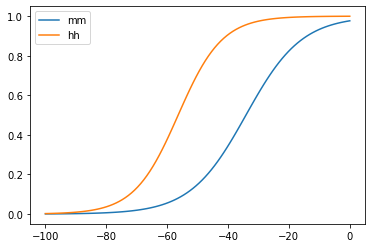

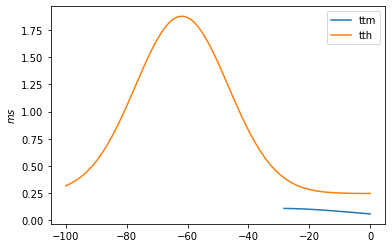

In [15]:
vv = linspace(-100, 0, 100)
mm = 1/(1 + exp((-34.12 - vv)/9.146))
hh = 1/(1 + exp((-56.39 - vv)/7.22))


plot(vv, mm, label='mm')
plot(vv, hh, label='hh')
legend()

ttm = 0.1092 * exp(-0.5 * ((vv + 28.71)/25.5)**1.8)
tth = 0.246 + 1.63 * exp(-0.5 * ((vv + 61.87)/15.25)**2)

figure()
plot(vv, ttm, label='ttm')
plot(vv, tth, label='tth')
ylabel("$ms$")
legend()

In [11]:
start_scope()

# morphology creation
cyl_len = 50 * umetre
cyl_diam = 50 * umetre
cylinder = Cylinder(length=cyl_len, diameter=cyl_diam, n=1, type="axon")

# consta and parameters
Cm = 1 * ufarad / cm**2
Eleak = -65.5 * mV
Vr = -57.4 * mV
gl = 1.42 * msiemens/cm**2

gNa_f_max = 25 * msiemens/cm**2

ENa = 62 * mV

# equations

main_eq = """
Im = gl * (Eleak - v) + INa_f : amp/meter**2
I : amp (point current)
"""

Na_f_eq = """
INa_f = gNa_f_max * m**3 * h * (ENa - v) : ampere/meter**2
dm/dt = (minf - m) / tau_m : 1
dh/dt = (hinf - h) / tau_h : 1
minf = 1 / (1 + exp((v12m - v)/slope_m)) : 1
hinf = 1 / (1 + exp((v12h - v)/slope_h)) : 1
tau_m = 0.1092*ms * exp(-0.5 * ((v + 28.71*mV)/25.5/mV)**1.8) : second
tau_h = 0.246*ms + 1.63*ms * exp(-0.5 * ((v + 61.87*mV)/15.25/mV)**2) : second
"""

Na_f_eq = Equations(Na_f_eq,
                    v12m=-34.12*mV,
                    v12h=-56.39*mV,
                    slope_m=9.146*mV,
                    slope_h=7.22*mV)
#l1Na_eq = Equations(pass)
#l2Na_eq = Equations(pass)

main_eq = Equations(main_eq) + Na_f_eq


# neuron main object
neuron = SpatialNeuron(morphology=cylinder,
                    model=main_eq, Cm=Cm, Ri=35.4*ohm*cm,
                    method="exponential_euler")

# monitors
mon = StateMonitor(neuron, 'v', record=True)

neuron.v = -70*mV
neuron.m = 0
neuron.h = 1


run(50*ms)
neuron.I = .55 * nA
run(25*ms)
neuron.I = 0*nA
run(50*ms)

WARNING    (string):32: RuntimeWarning: invalid value encountered in power
 [py.warnings]


BrianObjectException: Error encountered with object named 'spatialneuron_2'.
Object was created here (most recent call only, full details in debug log):
  File '/var/folders/dk/88m9s1b50v53bxqm50d17bjm0000gp/T/ipykernel_25412/1627672977.py', line 47, in <cell line: 47>
    neuron = SpatialNeuron(morphology=cylinder,

An exception occured during the execution of the 'run' block of code object spatialneuron_2_spatialstateupdater_codeobject.
The error was raised in the following line:
_array_spatialneuron_2__v_star[:] = solve_banded((1,1),_ab,_b,overwrite_ab=True,overwrite_b=True)
 (See above for original error message and traceback.)

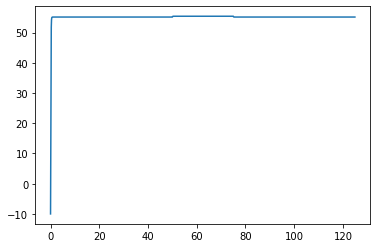

In [10]:
# result plots
plot(mon.t/ms, mon.v[0]/mV)